In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd workspace/theislab/mubind/notebooks/concatenation

/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/mubind/notebooks/concatenation


In [3]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../../annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/rio/miniconda3/envs/mubind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda:0


In [4]:
!ls -ltrh ../../../mubind-pipeline

total 16K
-rwxrwxrwx 1 rio rio 1.1K Nov 25 12:02 LICENSE
-rwxrwxrwx 1 rio rio  256 Nov 25 12:02 environment.yml
-rwxrwxrwx 1 rio rio  296 Nov 25 12:23 README.md
lrwxrwxrwx 1 rio rio   29 Nov 27 14:11 annotations -> /home/rio/Dropbox/annotations
drwxrwxrwx 1 rio rio 4.0K Dec  4 21:39 notebooks
drwxrwxrwx 1 rio rio 4.0K Dec  4 21:39 tests
-rwxrwxrwx 1 rio rio   10 Dec 23 11:55 gene_names_test.txt
-rwxrwxrwx 1 rio rio  844 Dec 23 11:55 pipeline_config.py
drwxrwxrwx 1 rio rio 4.0K Dec 23 11:58 __pycache__
-rwxrwxrwx 1 rio rio   46 Dec 23 17:13 gene_names_cardiac_complexes.txt
-rwxrwxrwx 1 rio rio  330 Dec 24 09:17 config_test.yaml
-rwxrwxrwx 1 rio rio   92 Dec 24 09:17 gene_names.txt
-rwxrwxrwx 1 rio rio 3.7K Dec 29 18:10 Snakefile
-rwxrwxrwx 1 rio rio  122 Dec 29 18:17 gene_names_all.txt
-rwxrwxrwx 1 rio rio  428 Dec 29 18:39 config.yaml
drwxrwxrwx 1 rio rio 4.0K Dec 29 18:42 output
drwxrwxrwx 1 rio rio 4.0K Dec 30 11:44 scripts


In [5]:
# import glob
# import pickle
# import os
# metrics_list = glob.glob('../../../mubind-pipeline/output/snakemake/*/metrics.tsv')
# metrics = pd.concat([pd.read_csv(f, index_col=0) for f in metrics_list])
#
# selex = metrics[~metrics['counts_path'].str.contains('PBM')]
# selex.shape
# selex.sort_values('r2_counts', ascending=False)


In [6]:
import os

In [7]:
# os.path.basename(selex.sort_values('r2_counts', ascending=False)['counts_path'])[0]))

In [89]:
import glob
import pickle
import os
models_list = glob.glob('../../../mubind-pipeline/output/snakemake/*/*/models/*.h5')
print(len(models_list))
models = []
for model_path in models_list:
    # if not 'N_200' in model_path or 'K_1' in model_path or not 'B_64' in model_path or not 'L_0.01' in model_path:
    #     continue
    if not 'ALX1' in model_path:
        continue
    pkl_path = model_path.replace('.h5', '.pkl')
    print(pkl_path)

    if not os.path.exists(model_path) or not os.path.exists(pkl_path):
        continue
    model = pickle.load(open(pkl_path, 'rb'))
    # model.load_state_dict(torch.load(model_path))
    models.append(model)
    # break
    continue
    # model = pickle.load(open(pkl_path, 'rb'))

# results
results_paths = glob.glob('../../../mubind-pipeline/output/snakemake/*/*/metrics.tsv')
print(len(models_list))
metrics = []
for results_path in results_paths:
    # print(results_path)
    # if not 'N_200' in model_path or 'K_1' in model_path or not 'B_64' in model_path or not 'L_0.01' in model_path:
    #     continue
    if not 'ALX1' in results_path:
        continue

    df = pd.read_csv(results_path)
    metrics.append(df)

metrics = pd.concat(metrics)

80
../../../mubind-pipeline/output/snakemake/SELEX/ALX1/models/N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000.pkl
../../../mubind-pipeline/output/snakemake/SELEX/ALX1/models/N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TCCTTG40NGGT_0_0-TCCTTG40NGGT_1000.pkl
80


In [90]:
metrics

,Unnamed: 0,tf_name,r0,library,counts_path,n_sample_parm,batch_size,learning_rate,n_epochs,n_kernels,best_loss,r2_counts,r2_foldchange,r2_enr,r2_fc,pearson_foldchange,running_time
0,0,ALX1,ZeroCycle_TACCAA40NTTA_0_0,TACCAA40NTTA,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.272568,0.902201,0.699056,0.957672,0.700366,0.836879,37.950669
1,1,ALX1,ZeroCycle_TCCTTG40NGGT_0_0,TCCTTG40NGGT,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.337969,0.902677,0.581234,0.972720,0.583775,0.764052,38.669419


In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [50]:
binding_modes = mb.tl.binding_modes('../../../mubind-pipeline/output/snakemake/SELEX/ALX1', device=device, stop_at=20)

Loaded model N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000.pkl
Loaded model N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TCCTTG40NGGT_0_0-TCCTTG40NGGT_1000.pkl
# of models 2


In [102]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 3, 8
rcParams['figure.dpi'] = 90
# binding_modes

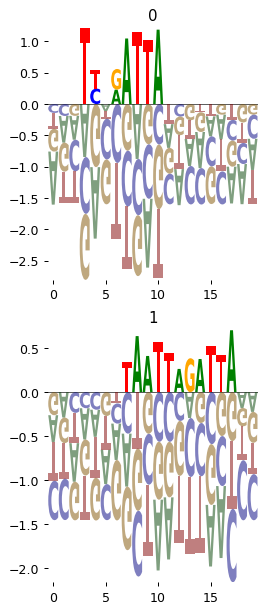

In [103]:
mb.pl.conv_mono(binding_modes, n_cols=1, n_rows=len(binding_modes))

In [141]:
def calculate_distances(mono_list):
    res = []
    for a, b in itertools.product(enumerate(mono_list), repeat=2):
        if a[0] > b[0]:
            continue
        df2 = mb.tl.distances_dataframe(a[1], b[1])
        df2['a'] = a[0]
        df2['b'] = b[0]
        res.append(df2)
        df3 = mb.tl.distances_dataframe(b[1], a[1])
        df3['a'] = b[0]
        df3['b'] = a[0]
        res.append(df3)
        # print(res[-1])
    res = pd.concat(res)
    res = pd.concat([res[['a', 'b']], res[[c for c in res if not c in ['a', 'b']]]], axis=1)
    res['id'] = res['a'].astype(str) + '_' + res['b'].astype(str)
    return res

import itertools
def reduce_groups(binding_modes, plot=False, thr_group=0.01):
    best = None
    iteration_i = 0
    monos = [b.weight for b in binding_modes.conv_mono]
    monos = [m.cpu().detach().numpy().squeeze() for m in monos]

    while True:
        iteration_i += 1
        print('iteration', iteration_i)

        res = calculate_distances([m.copy() for m in monos])

        if plot:
            import seaborn as sns;
            df_min = res.groupby('id').min()
            hm = df_min.pivot('a', 'b', 'distance').fillna(1)
            sns.clustermap(hm, cmap='Reds_r', figsize=[5, 5]) #  annot=hm, fmt='.2f')

        best = res[res['a'] > res['b']].sort_values('distance').drop_duplicates('id')
        best = best[(best['distance'] < thr_group)]
        # define a mask to ignore grouping
        ignore = set()
        mask_ignore = []
        for ri, r in best.iterrows():
            mask_ignore.append(r['a']  in ignore or r['b'] in ignore)
            ignore.add(r['a'])
            ignore.add(r['b'])
        best['ignore'] = mask_ignore
        best = best[~best['ignore']]
        print('# grouping', best.shape)

        if best.shape[0] == 0:
            print('done. No more groups to generate')
            break

        for ri, r in best.iterrows():
            print(r.values)
            a_i, b_i = r['a'], r['b']
            start_a, start_b = r['a_start'], r['b_start']
            length_a, length_b = r['k'], r['k']
            flip_b = r['b_flip']

            m_a, m_b = monos[a_i].squeeze(), monos[b_i].squeeze()
            sub_m1 = mb.tl.submatrix(m_a, start_a, length_a, 0, filter_neg_weights=False)
            sub_m2 = mb.tl.submatrix(m_b, start_b, length_b, flip_b, filter_neg_weights=False)
            # mb.pl.conv_mono(weights_list=[m_a, m_b, sub_m1, sub_m2], n_rows=4, n_cols=1, figsize=[9, 4])

            width_diff = m_a.shape[-1] - m_b.shape[-1]
            if width_diff > 0:
                m_b = np.concatenate([np.zeros((4, width_diff)), m_b], axis=1)
            elif width_diff < 0:
                m_a = np.concatenate([np.zeros((4, -width_diff)), m_a], axis=1)
            assert m_a.shape[-1] == m_b.shape[-1]

            shift = start_b - start_a
            if shift >= 0:
                print('option 1')
                merged_a = np.concatenate([np.zeros((4, shift)), m_a], axis=1)
                merged_b = np.concatenate([m_b, np.zeros((4, shift))], axis=1)
            else:
                print('option 2')
                merged_a = np.concatenate([m_a, np.zeros((4, -shift))], axis=1)
                merged_b = np.concatenate([np.zeros((4, -shift)), m_b], axis=1)

            if flip_b: # flip the b matrix before merging
                merged_b = mb.tl.submatrix(merged_b, 0, merged_b.shape[-1], 1, filter_neg_weights=False)

            print(m_a.shape, m_b.shape, merged_a.shape, merged_b.shape, width_diff, shift)
            merged = (merged_a + merged_b) / 2

            # reduction. Replace a and remove b
            monos[a_i] = merged
            monos[b_i] = None

            if plot:
                mb.pl.conv_mono(weights_list=[m_a, m_b, sub_m1, sub_m2,
                                              merged_a, merged_b, merged], n_rows=7, n_cols=1, figsize=[9, 4])
                plt.show()

        monos = [m for m in monos if m is not None]
        print('# of remaining groups', len(monos))
    return monos


In [143]:
reduced_groups = reduce_groups(binding_modes)

iteration 1
# grouping (0, 0)
done. No more groups to generate


In [144]:
# mb.pl.conv_mono(reduced_groups, n_cols=1, n_rows=len(reduced_groups))

### Using the generated models, reload the data, set them up as priors, and relearn actitivies

In [145]:
import os

n_sample = 1000
df = []

input_paths = glob.glob('../../../mubind-pipeline/output/snakemake/SELEX/ALX1/*.tsv.gz')
batch = 0
for p in input_paths:
    # print(p)
    df2 = pd.read_csv(p, sep='\t', index_col=0) # .head(100)
    assert 'batch' in df2
    # print(df2.columns)
    # df2 = df2.sample(100000)
    n_rounds = len(df2.columns) - 2
    df2.columns =  list(range(n_rounds)) + ['batch', 'is_count_data']
    df2['batch'] = batch
    df2['n_rounds'] = n_rounds
    # df2 = mb.pp.sample_rounds(df2, n_rounds, n_sample_per_round)
    print(df2.shape)
    df2 = df2.sample(n_sample)
    print(p, df2.shape, n_rounds)
    batch += 1
    df.append(df2)
    # assert False
    # break

df = pd.concat(df)
df = df[[c for c in df.columns if not c in ['batch', 'is_count_data', 'n_rounds']] + ['batch', 'is_count_data', 'n_rounds']]



(1000, 8)
../../../mubind-pipeline/output/snakemake/SELEX/ALX1/ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000.tsv.gz (1000, 8) 5
(1000, 8)
../../../mubind-pipeline/output/snakemake/SELEX/ALX1/ALX1-ZeroCycle_TCCTTG40NGGT_0_0-TCCTTG40NGGT_1000.tsv.gz (1000, 8) 5


In [146]:
df.shape

(2000, 8)

In [147]:
dataset = mb.datasets.SelexDataset(df, n_rounds=df['n_rounds'], labels=list(df.columns[:-3]), store_rev=False)
train = tdata.DataLoader(dataset=dataset,
                         # batch_size=256,
                         batch_size=512,
                         shuffle=False)


In [148]:
n_kernels = len(reduced_groups)

In [149]:
criterion = mb.tl.PoissonLoss()

n_rounds = train.dataset.n_rounds
n_batches = train.dataset.n_batches
enr_series = train.dataset.enr_series

model = mb.models.Multibind(
    datatype="selex",
    kernels=[0] + [m.shape[-1] for m in reduced_groups],
    n_rounds=n_rounds,
    init_random=False,
    n_batches=n_batches,
    enr_series=enr_series,
).to(device)



In [150]:
for i, mono_best in enumerate(reduced_groups):
    # print(mono_best.shape, model.binding_modes.conv_mono[i + 1].weight.shape)
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
    new_w = mono_best.reshape([1, 1] + list(mono_best.shape))
    model.binding_modes.conv_mono[i + 1].weight = torch.nn.Parameter(torch.tensor(new_w, dtype=torch.float))
    # print(model.binding_modes.conv_mono[i + 1].weight.device)

# move the model a final time to the GPU
model = model.to(device)

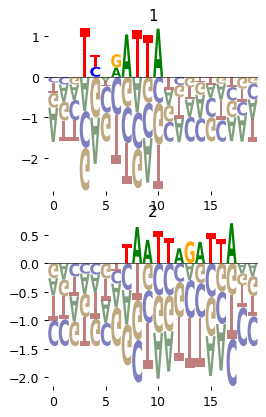

In [151]:
mb.pl.conv_mono(model, n_rows=len(reduced_groups) + 1, n_cols=1)

In [152]:
# block kernels that we do not require to optimize
verbose = 1
i = -1
feat_i = 'mono'
for ki in range(n_kernels + 1):
    mask_mono = (ki == i) and (feat_i == 'mono')
    mask_dinuc = (ki == i) and (feat_i == 'dinuc')
    if verbose != 0:
        print("setting grad status of kernel (mono, dinuc) at %i to (%i, %i)" % (ki, mask_mono, mask_dinuc))
    model.binding_modes.update_grad_mono(ki, mask_mono)
    model.binding_modes.update_grad_di(ki, mask_dinuc)

setting grad status of kernel (mono, dinuc) at 0 to (0, 0)
setting grad status of kernel (mono, dinuc) at 1 to (0, 0)
setting grad status of kernel (mono, dinuc) at 2 to (0, 0)


In [153]:
# assert False
next_optimiser = topti.Adam(model.parameters(), lr=0.025, weight_decay=0.001)
next_early_stopping = 25
log_each = 25
dirichlet_regularization = 0
exp_max = 40
verbose = 1
num_epochs = 1000

mb.tl.optimize_simple(
    model,
    train,
    device,
    next_optimiser,
    criterion,
    num_epochs=num_epochs,
    early_stopping=next_early_stopping,
    log_each=log_each,
    dirichlet_regularization=dirichlet_regularization,
    exp_max=exp_max,
    verbose=verbose,
)


optimizer:  <class 'torch.optim.adam.Adam'> 
criterion: <class 'mubind.tl.loss.PoissonLoss'> 
# epochs: 1000 
early_stopping: 25
lr= 0.025, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.315477 , best epoch: 24 secs per epoch: 0.061 s
Epoch: 51, Loss: 0.313700 , best epoch: 49 secs per epoch: 0.050 s
Epoch: 76, Loss: 0.313208 , best epoch: 74 secs per epoch: 0.046 s
Epoch: 101, Loss: 0.313037 , best epoch: 99 secs per epoch: 0.043 s
Epoch: 126, Loss: 0.312961 , best epoch: 124 secs per epoch: 0.042 s
Epoch: 151, Loss: 0.312920 , best epoch: 149 secs per epoch: 0.042 s
Epoch: 176, Loss: 0.312897 , best epoch: 174 secs per epoch: 0.042 s
Epoch: 201, Loss: 0.312882 , best epoch: 199 secs per epoch: 0.041 s
Epoch: 226, Loss: 0.312873 , best epoch: 224 secs per epoch: 0.040 s
Epoch: 251, Loss: 0.312868 , best epoch: 249 secs per epoch: 0.040 s
Epoch: 276, Loss: 0.312865 , best epoch: 274 secs per epoch: 0.040 s
Epoch: 301, Loss: 0.312863 , best epoch: 299 secs per epoch: 0.040 s
Epoc

<AxesSubplot: >

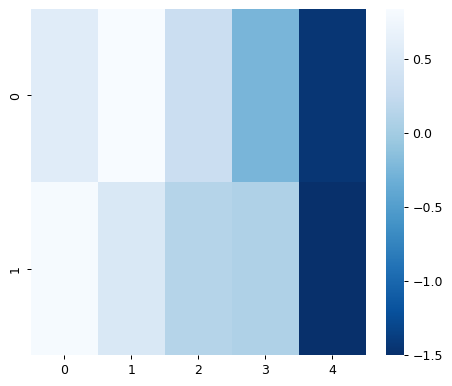

In [154]:
import seaborn as sns
rcParams['figure.figsize'] = 6, 5
sns.heatmap(model.get_log_etas().detach().cpu().numpy(), cmap='Blues_r')

0
1


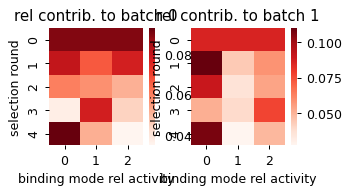

In [155]:
rcParams['figure.figsize'] = 20, 20
mb.pl.activities(model, n_cols=10, n_rows=8)

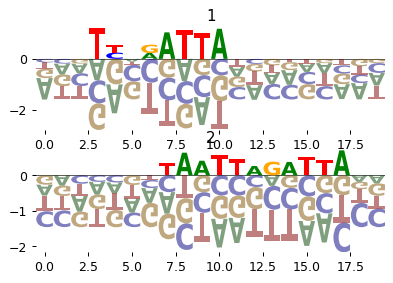

In [156]:
rcParams['figure.figsize'] = 5, 5
mb.pl.conv_mono(model, n_rows=len(reduced_groups) + 1, n_cols=1)


In [174]:
metrics

,Unnamed: 0,tf_name,r0,library,counts_path,n_sample_parm,batch_size,learning_rate,n_epochs,n_kernels,best_loss,r2_counts,r2_foldchange,r2_enr,r2_fc,pearson_foldchange,running_time
0,0,ALX1,ZeroCycle_TACCAA40NTTA_0_0,TACCAA40NTTA,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.272568,0.902201,0.699056,0.957672,0.700366,0.836879,37.950669
1,1,ALX1,ZeroCycle_TCCTTG40NGGT_0_0,TCCTTG40NGGT,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.337969,0.902677,0.581234,0.972720,0.583775,0.764052,38.669419


In [173]:
pd.DataFrame(mb.tl.scores(model, train, by='batch')).T

,r2_counts,r2_foldchange,r2_enr,r2_fc,pearson_foldchange
0,0.899316,0.694968,0.956249,0.696692,0.834681
1,0.893933,0.565285,0.966587,0.569773,0.754833


{'r2_counts': 0.897083706375007,
 'r2_foldchange': 0.6403197891208124,
 'r2_enr': 0.9604470984921264,
 'r2_fc': 0.6429702578634565,
 'pearson_foldchange': 0.8018542622343892}

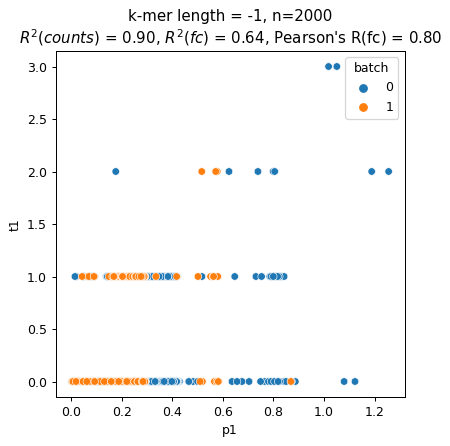

In [164]:
mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1', show=False)
